In [12]:
#Laster inn aktuelle pakker
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="" style="">
<thead>
<tr>
<td>
                Modell (temp. varierte fra 0° til -10°)
                </td>
<td>
                WLTP-tall
                </td>
<td>
                STOPP
                </td>
<td>
                Avvik
                </td>
</tr>
</thead>
<tbody>
<tr><td>Tesla Model 3 LR Dual motor</td><td>614 km/14,7 kWh</td><td>521 km</td><td>-15,15 %</td></tr>
<tr><td>Mercedes-Benz EQS 580 4matic</td><td>645 km/18,3 kWh</td><td>513 km</td><td>-20,47 %</td></tr>
<tr><td>BMW iX xDrive50</td><td>591 km/21,4 kWh</td><td>503 km</td><td>-14,89 %</td></tr>
<tr><td>Tesla Model Y LR Dual motor</td><td>507 km/16,9 kWh</td><td>451 km</td><td>-11,05 %</td></tr>
<tr><td>Volkswagen ID.3 PRO S</td><td>539 km/16,3 kWh</td><td>435 km</td><td>-19,29 %</td></tr>
<tr><td>Kia EV6 2WD</td><td>528 km/16,5 kWh</td><td>429 km</td><td>-18,75 %</td></tr>
<tr><td>NIO ES8 LR 7-seter</td><td>488 km/21,5 kWh</td><td>425 km</td><td>-12,91 %</td></tr>
<tr><td>Kia EV6 4WD</td><td>484 

In [14]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['                Modell (temp. varierte fra 0° til -10°)                ', '                WLTP-tall                ', '                STOPP                ', '                Avvik                '], ['Tesla Model 3 LR Dual motor', '614 km/14,7 kWh', '521 km', '-15,15 %'], ['Mercedes-Benz EQS 580 4matic', '645 km/18,3 kWh', '513 km', '-20,47 %'], ['BMW iX xDrive50', '591 km/21,4 kWh', '503 km', '-14,89 %'], ['Tesla Model Y LR Dual motor', '507 km/16,9 kWh', '451 km', '-11,05 %'], ['Volkswagen ID.3 PRO S', '539 km/16,3 kWh', '435 km', '-19,29 %'], ['Kia EV6 2WD', '528 km/16,5 kWh', '429 km', '-18,75 %'], ['NIO ES8 LR 7-seter', '488 km/21,5 kWh', '425 km', '-12,91 %'], ['Kia EV6 4WD', '484 km/18,0 kWh', '423 km', '-12,60 %'], ['Volkswagen ID.4 Pro', '485 km/18,4 kWh', '414 km', '-14,64 %'], ['Hyundai Ioniq 5 2WD', '481 km/16,8 kWh', '408 km', '-15,18 %'], ['BMW i4 M50', '497 km/19,0 kWh', '406 km', '-18,31 %'], ['Skoda Enyaq iV80X', '477 km/18,2 kWh', '403 km', '-15,51 %'], ['Porsch

In [15]:
';'.join(table[0])

'                Modell (temp. varierte fra 0° til -10°)                ;                WLTP-tall                ;                STOPP                ;                Avvik                '

In [16]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('wltpresultat.csv',table)

In [17]:
import pandas as pd
df=pd.read_csv('wltpresultat.csv', delimiter=';', encoding='latin1')
df
df.columns

Index(['                Modell (temp. varierte fra 0Â° til -10Â°)                ',
       '                WLTP-tall                ',
       '                STOPP                ',
       '                Avvik                '],
      dtype='object')

In [18]:
#Gir kolonnen nyen navn
new_column_names = {'                Modell (temp. varierte fra 0Â° til -10Â°)                ': 'Model',
                    '                WLTP-tall                ': 'WLTP',
                    '                STOPP                ': 'Stopp',
                    '                Avvik                ': 'Avvik'}
df = df.rename(columns=new_column_names)
df

,Model,WLTP,Stopp,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [19]:
df[['WLTP-rekkevidde', 'WLTP-forbruk']] = df['WLTP'].str.split('/', expand=True)
df = df.drop('WLTP', axis=1)
df

,Model,Stopp,Avvik,WLTP-rekkevidde,WLTP-forbruk
0,Tesla Model 3 LR Dual motor,521 km,"-15,15 %",614 km,"14,7 kWh"
1,Mercedes-Benz EQS 580 4matic,513 km,"-20,47 %",645 km,"18,3 kWh"
2,BMW iX xDrive50,503 km,"-14,89 %",591 km,"21,4 kWh"
3,Tesla Model Y LR Dual motor,451 km,"-11,05 %",507 km,"16,9 kWh"
4,Volkswagen ID.3 PRO S,435 km,"-19,29 %",539 km,"16,3 kWh"
5,Kia EV6 2WD,429 km,"-18,75 %",528 km,"16,5 kWh"
6,NIO ES8 LR 7-seter,425 km,"-12,91 %",488 km,"21,5 kWh"
7,Kia EV6 4WD,423 km,"-12,60 %",484 km,"18,0 kWh"
8,Volkswagen ID.4 Pro,414 km,"-14,64 %",485 km,"18,4 kWh"
9,Hyundai Ioniq 5 2WD,408 km,"-15,18 %",481 km,"16,8 kWh"


In [20]:
df = df[(df['Stopp'] != 'x') & (df['Avvik'] != 'x')]
df

,Model,Stopp,Avvik,WLTP-rekkevidde,WLTP-forbruk
0,Tesla Model 3 LR Dual motor,521 km,"-15,15 %",614 km,"14,7 kWh"
1,Mercedes-Benz EQS 580 4matic,513 km,"-20,47 %",645 km,"18,3 kWh"
2,BMW iX xDrive50,503 km,"-14,89 %",591 km,"21,4 kWh"
3,Tesla Model Y LR Dual motor,451 km,"-11,05 %",507 km,"16,9 kWh"
4,Volkswagen ID.3 PRO S,435 km,"-19,29 %",539 km,"16,3 kWh"
5,Kia EV6 2WD,429 km,"-18,75 %",528 km,"16,5 kWh"
6,NIO ES8 LR 7-seter,425 km,"-12,91 %",488 km,"21,5 kWh"
7,Kia EV6 4WD,423 km,"-12,60 %",484 km,"18,0 kWh"
8,Volkswagen ID.4 Pro,414 km,"-14,64 %",485 km,"18,4 kWh"
9,Hyundai Ioniq 5 2WD,408 km,"-15,18 %",481 km,"16,8 kWh"


In [22]:
df['WLTP (km)'] = pd.to_numeric(df['WLTP-rekkevidde'].str.replace(' km', ''))
df['Energiforbruk (kwh)'] = df['WLTP-forbruk'].str.replace(' kWh', '') 
df['Stopp (km)'] = pd.to_numeric(df['Stopp'].str.replace(' km', '')) 
df['Avvik (prosent)'] = df['Avvik'].str.replace(' %', '')  
df

/tmp/ipykernel_11949/3478260156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WLTP (km)'] = pd.to_numeric(df['WLTP-rekkevidde'].str.replace(' km', ''))
/tmp/ipykernel_11949/3478260156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Energiforbruk (kwh)'] = df['WLTP-forbruk'].str.replace(' kWh', '')
/tmp/ipykernel_11949/3478260156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Model,Stopp,Avvik,WLTP-rekkevidde,WLTP-forbruk,WLTP (km),Energiforbruk (kwh),Stopp (km),Avvik (prosent)
0,Tesla Model 3 LR Dual motor,521 km,"-15,15 %",614 km,"14,7 kWh",614,"14,7",521,"-15,15"
1,Mercedes-Benz EQS 580 4matic,513 km,"-20,47 %",645 km,"18,3 kWh",645,"18,3",513,"-20,47"
2,BMW iX xDrive50,503 km,"-14,89 %",591 km,"21,4 kWh",591,"21,4",503,"-14,89"
3,Tesla Model Y LR Dual motor,451 km,"-11,05 %",507 km,"16,9 kWh",507,"16,9",451,"-11,05"
4,Volkswagen ID.3 PRO S,435 km,"-19,29 %",539 km,"16,3 kWh",539,"16,3",435,"-19,29"
5,Kia EV6 2WD,429 km,"-18,75 %",528 km,"16,5 kWh",528,"16,5",429,"-18,75"
6,NIO ES8 LR 7-seter,425 km,"-12,91 %",488 km,"21,5 kWh",488,"21,5",425,"-12,91"
7,Kia EV6 4WD,423 km,"-12,60 %",484 km,"18,0 kWh",484,"18,0",423,"-12,60"
8,Volkswagen ID.4 Pro,414 km,"-14,64 %",485 km,"18,4 kWh",485,"18,4",414,"-14,64"
9,Hyundai Ioniq 5 2WD,408 km,"-15,18 %",481 km,"16,8 kWh",481,"16,8",408,"-15,18"


<function matplotlib.pyplot.show(close=None, block=None)>

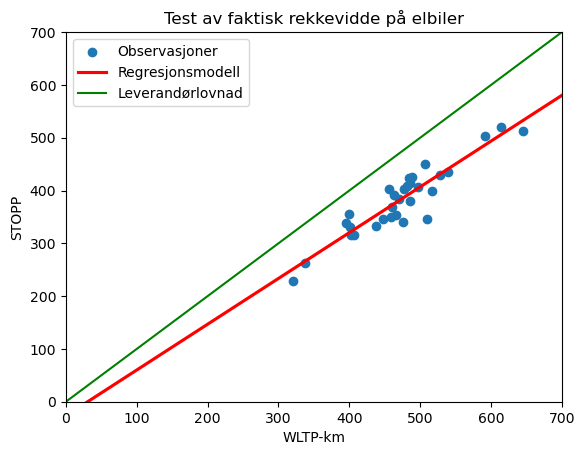

In [25]:
np.linspace(0, 700, num=10)
            
#Lager plot
plt.xlim([0, 700])
plt.ylim([0, 700])

plt.scatter(df['WLTP (km)'], df['Stopp (km)'], label='Observasjoner')
sns.regplot(x='WLTP (km)', y='Stopp (km)', data=df, ci=None, truncate=False, scatter=False, color="red", label="Regresjonsmodell")
plt.plot(np.linspace(0, 700, num=10), np.linspace(0, 700, num=10), color='green', label='Leverandørlovnad')

plt.title('Test av faktisk rekkevidde på elbiler')
plt.xlabel('WLTP-km')
plt.ylabel('STOPP')
plt.legend(loc='best')

plt.show